In [1]:
from header import *
import scipy.constants as cnst

In [2]:
# --- constants --- 

#masses of nuclear particles:
        
#time unit in seconds 
T_unit=10**(-15)
L_unit=10**(-12)
E_unit=cnst.eV
M_unit=E_unit*T_unit**2/L_unit**2

assert(M_unit==E_unit*T_unit**2/L_unit**2)

#mass of the alpha particle
m1=(cnst.physical_constants['alpha particle mass'][0])/M_unit

#mass of the muon
m2=(cnst.physical_constants['muon mass'][0])/M_unit

#mass of the electron
m3=cnst.m_e/M_unit

m2=m3

#hbar
hbar=cnst.hbar/(E_unit*T_unit)

#elementry charge
e=cnst.e

#vacume permiativity
epsilon0=(cnst.physical_constants['vacuum electric permittivity'][0])*L_unit*E_unit



In [3]:
def I110(a,b,c):
    x=1/(a+b)
    y=1/(a+c)
    z=1/(b+c)

    return 16*np.pi**2*x*y*z*(2*x**2+x*y+x*z+y*z)

def I111(a,b,c):
    x=1/(a+b)
    y=1/(a+c)
    z=1/(b+c)

    return 32*np.pi**2*x*y*z*(x**2*(y+z)+y**2*(x+z)+z**2*(x+y)+x*y*z)

def I210(a,b,c):
    x=1/(a+b)
    y=1/(a+c)
    z=1/(b+c)

    return 32*np.pi**2*x*y*z*(x**2*(3*x+2*y+z)+y**2*(x+z)+x*y*z)

def I300(a,b,c):
    x=1/(a+b)
    y=1/(a+c)
    z=1/(b+c)

    return 96*np.pi**2*x*y*z*(x+y)*(x**2+y**2)

In [4]:
def N_func(i,j,alphas,betas,gammas):
        
    return I111(np.conjugate(alphas[i])+alphas[j],np.conjugate(betas[i])+betas[j],np.conjugate(gammas[i])+gammas[j])

In [5]:

def H_func(i,j,alphas,betas,gammas):
	
	a=np.conj(alphas[i])+alphas[j]
	b=np.conj(betas[i])+betas[j]
	c=np.conj(gammas[i])+gammas[j]

	T=-0.5*hbar**2*(
			((alphas[j]**2+betas[j]**2)/m1  +  (alphas[j]**2+gammas[j]**2)/m2  +  (betas[j]**2+gammas[j]**2)/m3)*I111(a,b,c)
			
			-2*alphas[j]*(1/m1+1/m2)*I110(c,b,a)
			-2*betas[j]*(1/m1+1/m3)*I110(a,c,b)  
			-2*gammas[j]*(1/m2+1/m3)*I110(a,b,c) 
				
			+alphas[j]*betas[j]/m1*(I210(a,b,c)+I210(b,a,c)-I300(c,b,a))
			+alphas[j]*gammas[j]/m2*(I210(a,c,b)+I210(c,a,b)-I300(b,a,c))
			+betas[j]*gammas[j]/m3*(I210(b,c,a)+I210(c,b,a)-I300(a,b,c))
			)
	
	
	V=(e**2/(4*np.pi*epsilon0))*(-2*I110(c,b,a)-2*I110(a,c,b)+I110(a,b,c))

	return (T+V)*N_func(i,j,alphas,betas,gammas)

1
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
2
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
3
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
4
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenval

c:\Users\myles\Documents\GitHub\3-particle-quantum-systems\header.py:69: RuntimeWarning: invalid value encountered in sqrt
  invs_sqrt_beta[:,i,i]=1/np.sqrt(self.N_eigenvalues[:,i])


Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
8
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
9
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing the P matrices.
Finding P eigenvectors and eigenvalues.
Calculating the energy levels.
10
Constructing the N matrices.
Constructing the H matrices.
Finding the eigenvectors and eigenvalues of the N matrices.
Constructing the Y matrices.
Constructing the inverse square root beta matrices.
Constructing th

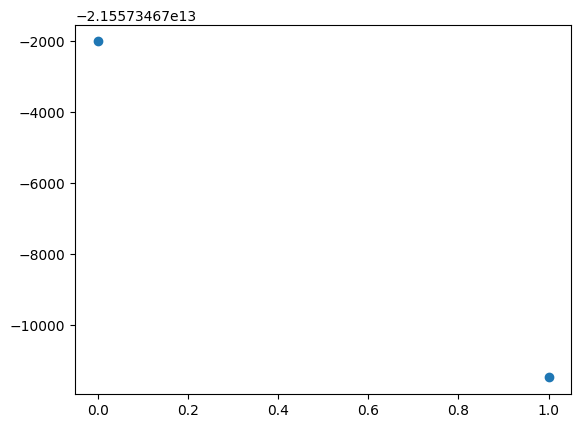

In [6]:

E=[]

ns=[1,2,3,4,5,6,7,8,9,10,11,12]

for n in ns:
    print(n)
    subspace=Subspace(n**3)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    param_range=np.geomspace(0.01,100,n)
    params=np.expand_dims(np.array(np.meshgrid(param_range,param_range,param_range,indexing='ij')).reshape(3,-1),-1)

    subspace.set_params(1,params)

    subspace.make_N_mats_vectorized()
    subspace.make_H_mats_vectorized()
    subspace.find_N_eigens()
    subspace.make_Y_mats()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()

    E.append(subspace.energy_levels[:,0])
    
import matplotlib.pyplot as plt
plt.scatter(np.arange(len(E)),E)

plt.show()

In [7]:
print(E)

[array([-2.15573467e+13]), array([-2.15573467e+13]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]


In [ ]:
print()